In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
sns.set()
%matplotlib inline

In [4]:
df = pd.read_csv("E:\ML\ML Dataset\credit_card_accept.csv")

In [5]:
#Data Preprocessing
owner = pd.get_dummies(df['owner'],drop_first=True)
selfemp = pd.get_dummies(df['selfemp'],drop_first=True)
df['dependents'] =   df.dependents.values +1 

#df['card'] = card
df['owner'] = owner
df['selfemp'] = selfemp
X = df

X.head(2)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.52,0.033270,124.983300,1,0,4,54,1,12
1,yes,0,33.25000,2.42,0.005217,9.854167,0,0,4,34,1,13


In [6]:
features = X.drop('selfemp' , axis = 1)
features = features.drop('owner' , axis = 1)
#features = features.drop('majorcards' , axis = 1)
#features = features.drop('months' , axis = 1)
features = features.drop('dependents' , axis = 1)
features = features.drop('age' , axis = 1)
features.head(2)

,card,reports,income,share,expenditure,months,majorcards,active
0,yes,0,4.52,0.033270,124.983300,54,1,12
1,yes,0,2.42,0.005217,9.854167,34,1,13


In [7]:
X_train,X_test , y_train,y_test = train_test_split(features.drop('card' , axis = 1 ) , features['card'] , random_state = 101 ,test_size = 0.3)

In [8]:
X_train.head(2)

,reports,income,share,expenditure,months,majorcards,active
545,0,3.0,0.010470,25.5075,3,1,11
635,0,2.5,0.054447,113.1808,8,1,5


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logistic  = LogisticRegression()

In [11]:
logistic.fit(X_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
pred = logistic.predict(X_test)

In [13]:
pred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes'

In [14]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          no       0.88      1.00      0.94        80
         yes       1.00      0.97      0.98       316

   micro avg       0.97      0.97      0.97       396
   macro avg       0.94      0.98      0.96       396
weighted avg       0.98      0.97      0.97       396



In [15]:
from sklearn.metrics import confusion_matrix

In [17]:
#print(confusion_matrix(y_test,pred))
# confusion_matrix(y_test,predictions)
confusion_df = pd.DataFrame(confusion_matrix(y_test,pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)


         Predicted Class 0  Predicted Class 1
Class 0                 80                  0
Class 1                 11                305


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf = RandomForestClassifier()
clf.fit(X_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
list(zip( X_train ,clf.feature_importances_))

[('reports', 0.055151595473283313),
 ('income', 0.031051826435874379),
 ('share', 0.52639497509635069),
 ('expenditure', 0.34166979476837567),
 ('months', 0.022865639069662835),
 ('majorcards', 0.0011340293532315312),
 ('active', 0.021732139803221681)]

In [21]:
#card = pd.get_dummies(features['card'] ,drop_first=True)
#features['card'] = card
features.head(2)

,card,reports,income,share,expenditure,months,majorcards,active
0,yes,0,4.52,0.033270,124.983300,54,1,12
1,yes,0,2.42,0.005217,9.854167,34,1,13


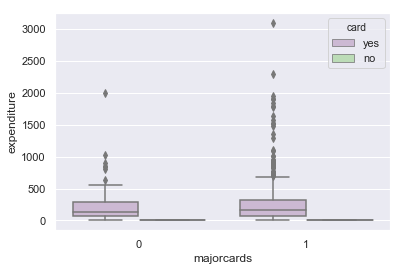

In [22]:
sns.boxplot(x="majorcards",y="expenditure",hue = "card",data = features,palette = "PRGn")

Text(0,0.5,'expenditure')

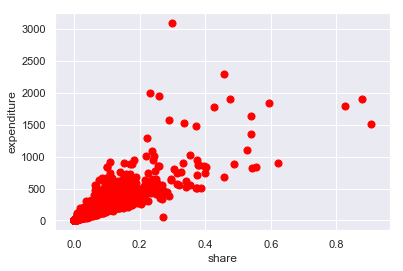

In [23]:
plt.scatter(features["share"],features["expenditure"],c = 'red' , s = 50 ) #c is a parameter to pass the color 
plt.xlabel("share")
plt.ylabel("expenditure")

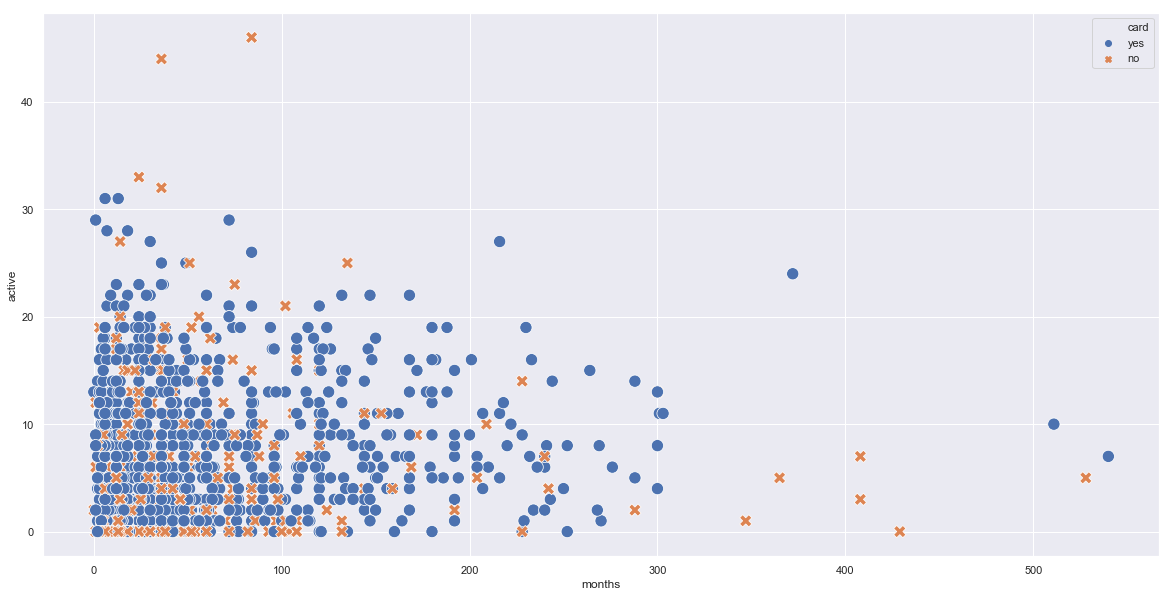

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = features['months'] , y = features["active"],s=150, hue=features['card'],style="card" , data = features)
#plt.scatter(features["share"],features["expenditure"],  c = 'red' , s = 50 ,) #c is a parameter to pass the color 
#plt.xlabel("share")
#plt.ylabel("expenditure")
plt.show()

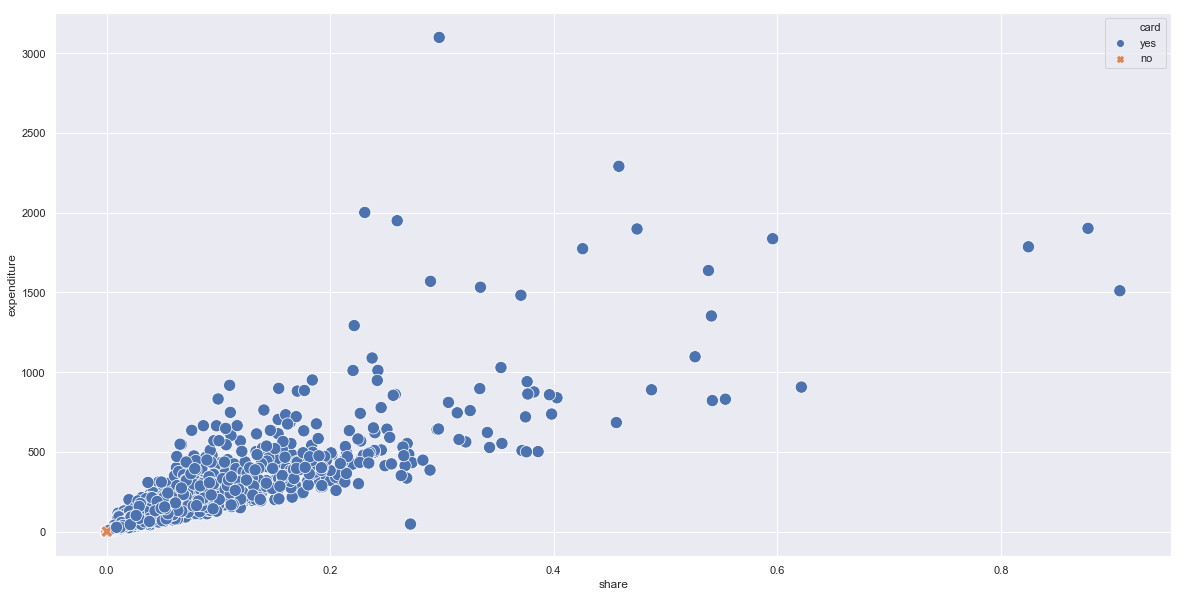

In [25]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = features["share"] , y = features["expenditure"],s=150, hue=features['card'],style="card" , data = features)
#plt.scatter(features["share"],features["expenditure"],  c = 'red' , s = 50 ,) #c is a parameter to pass the color 
#plt.xlabel("share")
#plt.ylabel("expenditure")

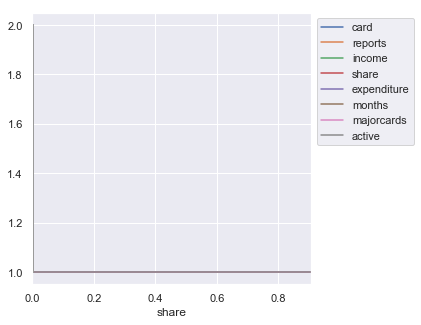

In [26]:
features[features['card']== 'yes'].groupby(features['share']).count().plot(figsize = (5,5))
plt.legend(bbox_to_anchor =(1,1),loc = 2)

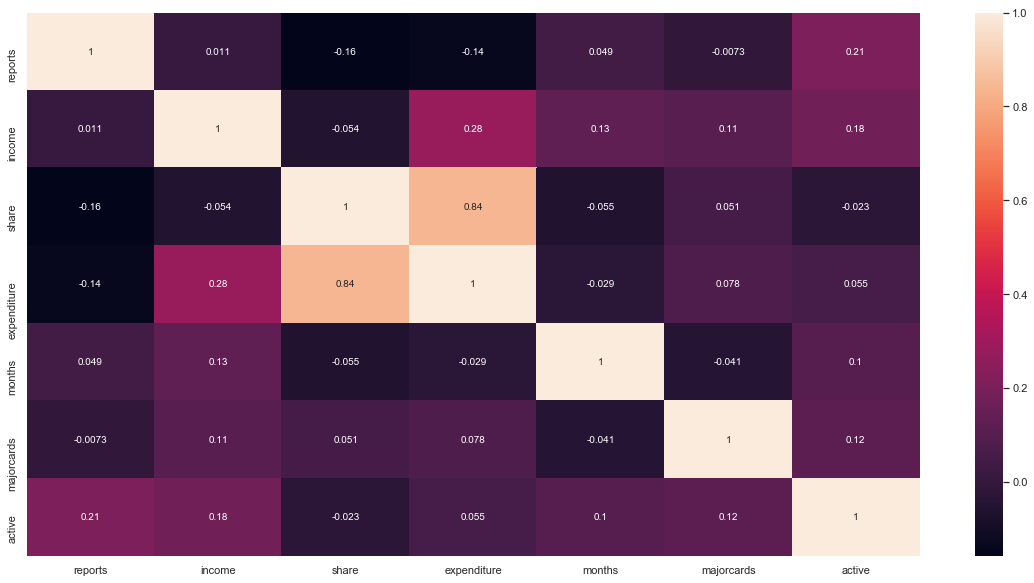

In [27]:
#correlation
plt.figure(figsize=(20,10))
Var_Corr = features.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

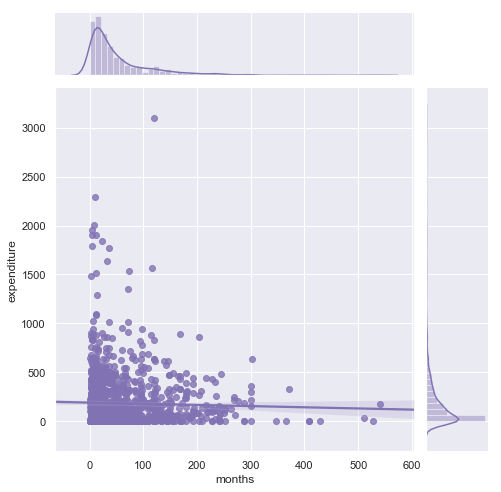

In [28]:
sns.set(style="darkgrid")

g = sns.jointplot("months", "expenditure", data=features, kind="reg",
                   color="m", height=7)

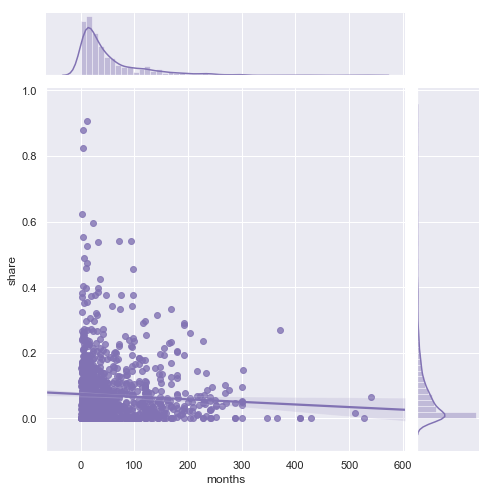

In [29]:
sns.set(style="darkgrid")

g = sns.jointplot("months", "share", data=features, kind="reg",
                   color="m", height=7)

<Figure size 720x720 with 0 Axes>

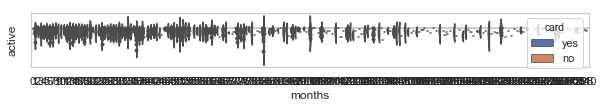

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize= (10,10) )
sns.palplot(sns.color_palette("muted"))
sns.violinplot(x='months' , y='active' ,hue='card' , data = features ,inner = "point" , scale="count" ,split=True)